# **Project Machine Learning with Python: Building Recommender System with Similarity Function**

---



# **About This Course:**
Pada bagian sebelumnya kita telah melihat bagaimana recommender system dibuat hanya dengan menggunakan average rating, dengan mengurutkan score yang terdapat komponen average rating secara descending, kita dapat mengetahui (secara estimasi) film mana yang menurut para audience paling menarik.

# **1. Introduction**
Membuat sebuah sistem rekomendasi berdasarkan konten dari sebuah film. 

# **Pengenalan Project**
Masih ingat dengan project ***Building Recommender System using Python***?

Pada bagian sebelumnya kita telah melihat bagaimana recommender system dibuat hanya dengan menggunakan average rating, dengan mengurutkan score yang terdapat komponen average rating secara descending, kita dapat mengetahui (secara estimasi) film mana yang menurut para audience paling menarik.

Kali ini, kita akan membuat recommender system yang menggunakan Content/feature dari film/entitas tersebut, kemudian melakukan perhitungan terhadap kesamaannya satu dan yang lain sehingga ketika kita menunjuk ke satu film, kita akan mendapat beberapa film lain yang memiliki kesamaan dengan film tersebut. Hal ini biasa kita sebut sebagai Content Based Recommender System.

Dengan membandingkan kesamaan plot yang ada dan genre yang ada, ketika audience lebih menyukai film Narnia, maka content based recommender system ini akan juga merekomendasikan film seperti Harry Potter atau The Lords of The Rings yang memiliki genre yang mirip

# **2. Task 1 - Unloading and Checking Datasets**
Pada bagian ini akan dilakukan import library yang dibutuhkan dan pembacaan dataset yang digunakan. 

# **Import Basics Library and File Unloading**
Langkah pertama yang harus kita lakukan adalah melakukan import library yang dibutuhkan untuk pengerjaan project ini dan melakukan pembacaan dataset.

**Notes:**
Library yang akan kita gunakan adalah `pandas as pd` dan `numpy as np`
Dataset yang akan digunakan adalah `movie_rating_df.csv`

**Akses dataset:**

**`movie_rating_df.csv`** = https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/movie_rating_df.csv

In [19]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np

#lakukan pembacaan dataset
movie_rating_df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/movie_rating_df.csv') #untuk menyimpan movie_rating_df.csv


# **Menampilkan 5 data teratas dan tipe data**
Setelah sebelumnya kita sudah menyimpan dataset pada variabel `movie_rating_df`, hal selanjutnya yang akan kita lakukan adalah menampilkan lima baris teratas dari dataset tersebut dan menampilkan info mengenai tipe data dari tiap kolom yang ada pada dataset. 

In [20]:
#tampilkan 5 baris teratas dari movive_rating_df
print(movie_rating_df.head())

#tampilkan info mengenai tipe data dari tiap kolom
print(movie_rating_df.info())

      tconst titleType  ... averageRating numVotes
0  tt0000001     short  ...           5.6     1608
1  tt0000002     short  ...           6.0      197
2  tt0000003     short  ...           6.5     1285
3  tt0000004     short  ...           6.1      121
4  tt0000005     short  ...           6.1     2050

[5 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751614 entries, 0 to 751613
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          751614 non-null  object 
 1   titleType       751614 non-null  object 
 2   primaryTitle    751614 non-null  object 
 3   originalTitle   751614 non-null  object 
 4   isAdult         751614 non-null  int64  
 5   startYear       751614 non-null  float64
 6   endYear         16072 non-null   float64
 7   runtimeMinutes  751614 non-null  float64
 8   genres          486766 non-null  object 
 9   averageRating   751614 non-null  float64
 10  num

# **Add Actors Dataframe**
Dari output yang sudah dihasilkan sebelumnya, kita dapat memperoleh list film dengan beberapa metadata seperti `isAdult`, `runtimeMinutes`, dan `genres` nya

Selanjutnya, kita akan menambahkan metadata lain seperti aktor/aktris yang bermain di film tersebut, kita akan menggunakan dataframe lain kemudian akan melakukan join dengan dataframe `movie_rating_df`. 

Dataset yang akan digunakan adalah **`actor_name.csv`**

**Akses dataset:** 

https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/actor_name.csv

In [21]:
#Simpan actor_name.csv pada variable name_df 
name_df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/actor_name.csv')

#Tampilkan 5 baris teratas dari name_df
print(name_df.head())

#Tampilkan informasi mengenai tipe data dari tiap kolom pada name_df
print(name_df.info())

       nconst  ...                           knownForTitles
0   nm1774132  ...  tt0417686,tt1713976,tt1891860,tt0454839
1  nm10683464  ...                                tt7718088
2   nm1021485  ...                                tt0168790
3   nm6940929  ...                                tt4232168
4   nm5764974  ...                                tt3014168

[5 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nconst             1000 non-null   object
 1   primaryName        1000 non-null   object
 2   birthYear          1000 non-null   object
 3   deathYear          1000 non-null   object
 4   primaryProfession  891 non-null    object
 5   knownForTitles     1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB
None


# **Add Directors and Writers Dataframe**
Dataframe yang akan ditambahkan selanjutnya adalah dataframe yang berisi directors dan writers dari film.

Dataset yang akan digunakan adalah `**directors_writers.csv**`

**Akses dataset:**

https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/directors_writers.csv

In [22]:
#Menyimpan dataset pada variabel director_writers
director_writers = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/directors_writers.csv')

#Manampilkan 5 baris teratas
print(director_writers.head())

#Menampilkan informasi tipe data
print(director_writers.info())


      tconst  ...                                      writer_name
0  tt0011414  ...                          John Emerson,Anita Loos
1  tt0011890  ...     Arthur F. Goodrich,Burns Mantle,Mary Murillo
2  tt0014341  ...  Jean C. Havez,Clyde Bruckman,Joseph A. Mitchell
3  tt0018054  ...                                Jeanie Macpherson
4  tt0024151  ...                 Max Miller,Wells Root,Jack Jevne

[5 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tconst         986 non-null    object
 1   director_name  986 non-null    object
 2   writer_name    986 non-null    object
dtypes: object(3)
memory usage: 23.2+ KB
None


# **Convert into List**
Setelah menampilkan informasi mengenai dataframe `directors_writer`, dapat dilihat bahwa tidak ada nilai *NULL* pada dataset tersebut. Hal selanjutnya yang akan kita lakukan adalah mengubah `director_name` dan `writer_name` dari string menjadi list. Setelah itu, tampilkan 5 baris teratas dari dataframe `director_writers`.

In [23]:
import pandas as pd
director_writers = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/directors_writers.csv')

#Mengubah director_name menjadi list
director_writers['director_name'] = director_writers['director_name'].apply(lambda row: row.split(','))
director_writers['writer_name'] = director_writers['writer_name'].apply(lambda row: row.split(','))

#Tampilkan 5 data teratas
print(director_writers.head())

      tconst  ...                                        writer_name
0  tt0011414  ...                         [John Emerson, Anita Loos]
1  tt0011890  ...   [Arthur F. Goodrich, Burns Mantle, Mary Murillo]
2  tt0014341  ...  [Jean C. Havez, Clyde Bruckman, Joseph A. Mitc...
3  tt0018054  ...                                [Jeanie Macpherson]
4  tt0024151  ...               [Max Miller, Wells Root, Jack Jevne]

[5 rows x 3 columns]


# **3. Task 2 - Cleaning and Processing Table Cast**
Membuang kolom-kolom yang tidak digunakan dan menghapus nilai NULL .

# **Update `name_df`**
Kita hanya akan membutuhkan kolom `nconst`, `primaryName`, dan `knownForTitles` pada `name_df` untuk mencocokkan aktor/aktris ini dengan film yang ada. 

In [24]:
name_df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/actor_name.csv')
#Kita hanya akan membutuhkan kolom nconst, primaryName, dan knownForTitles
name_df = name_df[['nconst','primaryName','knownForTitles']]

#Tampilkan 5 baris teratas dari name_df
print(name_df.head())

       nconst          primaryName                           knownForTitles
0   nm1774132    Nathan McLaughlin  tt0417686,tt1713976,tt1891860,tt0454839
1  nm10683464        Bridge Andrew                                tt7718088
2   nm1021485    Brandon Fransvaag                                tt0168790
3   nm6940929   Erwin van der Lely                                tt4232168
4   nm5764974  Svetlana Shypitsyna                                tt3014168


# **Movies per Actor**
Hal selanjutnya yang ingin kita ketahui adalah mengenai variasi dari jumlah film yang dapat dibintangi oleh seorang aktor.

Tentunya seorang aktor dapat membintangi lebih dari 1 film, bukan? maka akan diperlukan untuk membuat table yang mempunyai relasi 1-1 ke masing-masing title movie tersebut. Kita akan melakukan unnest terhadap table tersebut. 

Pekerjaan selanjutnya yang harus kita lakukan adalah:
* Melakukan pengecekan variasi jumlah film yang dibintangi oleh aktor. 
* Mengubah kolom `knownForTitles` menjadi list of list.

In [25]:
#Melakukan pengecekan variasi
print(name_df['knownForTitles'].apply(lambda x: len(x.split(','))).unique())

#Mengubah knownForTitles menjadi list of list
name_df['knownForTitles'] = name_df['knownForTitles'].apply(lambda x: x.split(','))

#Mencetak 5 baris teratas
print(name_df.head())

[4 1 2 3]
       nconst  ...                                knownForTitles
0   nm1774132  ...  [tt0417686, tt1713976, tt1891860, tt0454839]
1  nm10683464  ...                                   [tt7718088]
2   nm1021485  ...                                   [tt0168790]
3   nm6940929  ...                                   [tt4232168]
4   nm5764974  ...                                   [tt3014168]

[5 rows x 3 columns]


# **Korespondensi 1 - 1**
Karena pada data sebelumnya dapat dilihat bahwa seorang aktor dapat membintangi 1 sampai 4 film, diperlukan untuk membuat table yang mempunyai relasi 1-1 dari aktor ke masing-masing title movie tersebut. 

Contoh table yang tidak korespondensi 1-1:

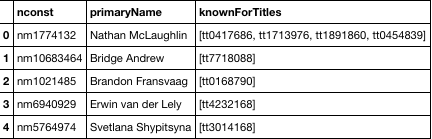

Contoh table korespondensi 1-1:

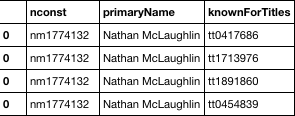



In [26]:
import numpy as np
#menyiapkan bucket untuk dataframe
df_uni = []

for x in ['knownForTitles']:
    #mengulang index dari tiap baris sampai tiap elemen dari knownForTitles
    idx = name_df.index.repeat(name_df['knownForTitles'].str.len())
   
   #memecah values dari list di setiap baris dan menggabungkan nya dengan rows lain menjadi dataframe
    df1 = pd.DataFrame({
        x: np.concatenate(name_df[x].values)
    })
    
    #mengganti index dataframe tersebut dengan idx yang sudah kita define di awal
    df1.index = idx
    #untuk setiap dataframe yang terbentuk, kita append ke dataframe bucket
    df_uni.append(df1)
    
#menggabungkan semua dataframe menjadi satu
df_concat = pd.concat(df_uni, axis=1)

#left join dengan value dari dataframe yang awal
unnested_df = df_concat.join(name_df.drop(['knownForTitles'], 1), how='left')

#select kolom sesuai dengan dataframe awal
unnested_df = unnested_df[name_df.columns.tolist()]
print(unnested_df)

         nconst        primaryName knownForTitles
0     nm1774132  Nathan McLaughlin      tt0417686
0     nm1774132  Nathan McLaughlin      tt1713976
0     nm1774132  Nathan McLaughlin      tt1891860
0     nm1774132  Nathan McLaughlin      tt0454839
1    nm10683464      Bridge Andrew      tt7718088
..          ...                ...            ...
998   nm5245804      Eliza Jenkins      tt1464058
999   nm0948460         Greg Yolen      tt0436869
999   nm0948460         Greg Yolen      tt0476663
999   nm0948460         Greg Yolen      tt0109723
999   nm0948460         Greg Yolen      tt0364484

[1918 rows x 3 columns]


# **4. Task 3 - Nesting primaryName group by knownForTitles**
Melakukan grouping kembali pada kolom player karena yang kita inginkan adalah level movie untuk melakukan movie recommendation.

# **Mengelompokkan `primaryName` menjadi list group by `knownForTitles`**
Selanjutnya, kita akan melakukan grouping kembali pada kolom player karena yang kita inginkan adalah level movie untuk melakukan movie recommendation.

In [27]:
unnested_drop = unnested_df.drop(['nconst'], axis=1)

#menyiapkan bucket untuk dataframe
df_uni = []

for col in ['primaryName']:
    #agregasi kolom PrimaryName sesuai group_col yang sudah di define di atas
    dfi = unnested_drop.groupby(['knownForTitles'])[col].apply(list)
    #Lakukan append
    df_uni.append(dfi)
df_grouped = pd.concat(df_uni, axis=1).reset_index()
df_grouped.columns = ['knownForTitles','cast_name']
print(df_grouped)

     knownForTitles           cast_name
0         tt0008125    [Charles Harley]
1         tt0009706    [Charles Harley]
2         tt0010304  [Natalie Talmadge]
3         tt0011414  [Natalie Talmadge]
4         tt0011890  [Natalie Talmadge]
...             ...                 ...
1893      tt9610496  [Stefano Baffetti]
1894      tt9714030        [Kevin Kain]
1895      tt9741820   [Caroline Plyler]
1896      tt9759814     [Ethan Francis]
1897      tt9856236     [Nuala Maguire]

[1898 rows x 2 columns]


# **5. Task 4 - Joining with Movie Table**

# **Join table**
Sekarang kita akan melakukan :

* join antara **movie table** dan **cast table**  (field `knownForTitles` dan `tconst`)
* join antara `base_df` dengan `director_writer` table (field `tconst` dan `tconst`)

In [28]:
movie_rating_df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/movie_rating_df.csv')

#join antara movie table dan cast table 
base_df = pd.merge(df_grouped, movie_rating_df, left_on='knownForTitles', right_on='tconst', how='inner')

#join antara base_df dengan director_writer table
base_df = pd.merge(base_df, director_writers, left_on='tconst', right_on='tconst', how='left')
print(base_df.head())

  knownForTitles  ...                                        writer_name
0      tt0011414  ...                         [John Emerson, Anita Loos]
1      tt0011890  ...   [Arthur F. Goodrich, Burns Mantle, Mary Murillo]
2      tt0014341  ...  [Jean C. Havez, Clyde Bruckman, Joseph A. Mitc...
3      tt0018054  ...                                [Jeanie Macpherson]
4      tt0024151  ...               [Max Miller, Wells Root, Jack Jevne]

[5 rows x 15 columns]


# **Cleaning data**
Setelah melakukan join table sebelumnya, sekarang hal yang akan kembali kita lakukan adalah melakukan cleaning pada data yang sudah dihasilkan. 

In [29]:
#Melakukan drop terhadap kolom knownForTitles
base_drop = base_df.drop(['knownForTitles'], axis=1)
print(base_drop.info())

#Mengganti nilai NULL pada kolom genres dengan 'Unknown'
base_drop['genres'] = base_drop['genres'].fillna('Unknown')

#Melakukan perhitungan jumlah nilai NULL pada tiap kolom
print(base_drop.isnull().sum())

#Mengganti nilai NULL pada kolom dorector_name dan writer_name dengan 'Unknown'
base_drop[['director_name','writer_name']] = base_drop[['director_name','writer_name']].fillna('unknown')

#karena value kolom genres terdapat multiple values, jadi kita akan bungkus menjadi list of list
base_drop['genres'] = base_drop['genres'].apply(lambda x: x.split(','))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1060 entries, 0 to 1059
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cast_name       1060 non-null   object 
 1   tconst          1060 non-null   object 
 2   titleType       1060 non-null   object 
 3   primaryTitle    1060 non-null   object 
 4   originalTitle   1060 non-null   object 
 5   isAdult         1060 non-null   int64  
 6   startYear       1060 non-null   float64
 7   endYear         110 non-null    float64
 8   runtimeMinutes  1060 non-null   float64
 9   genres          745 non-null    object 
 10  averageRating   1060 non-null   float64
 11  numVotes        1060 non-null   int64  
 12  director_name   986 non-null    object 
 13  writer_name     986 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 124.2+ KB
None
cast_name           0
tconst              0
titleType           0
primaryTitle        0
originalTitle   

# **Reformat table `base_df`**
Hal selanjutnya yang akan kita lakukan adalah melakukan reformat pada table `base_df` yang beberapa kolomnya sudah didrop.

In [30]:
#Drop kolom tconst, isAdult, endYear, originalTitle
base_drop2 = base_drop.drop(['tconst','isAdult','endYear','originalTitle'], axis=1)

base_drop2 = base_drop2[['primaryTitle','titleType','startYear','runtimeMinutes','genres','averageRating','numVotes','cast_name','director_name','writer_name']]


base_drop2.columns = ['title','type','start','duration','genres','rating','votes','cast_name','director_name','writer_name']
print(base_drop2.head())

                    title  ...                                        writer_name
0         The Love Expert  ...                         [John Emerson, Anita Loos]
1               Yes or No  ...   [Arthur F. Goodrich, Burns Mantle, Mary Murillo]
2         Our Hospitality  ...  [Jean C. Havez, Clyde Bruckman, Joseph A. Mitc...
3       The King of Kings  ...                                [Jeanie Macpherson]
4  I Cover the Waterfront  ...               [Max Miller, Wells Root, Jack Jevne]

[5 rows x 10 columns]


# **6. Task 5 - Creating Content-based Recommender System**

# **Klasifikasi Metadata**
kita akan klasifikasikan berdasarkan metadata genres, `primaryName` (cast name), `director name`, dan `writer_name`.

In [31]:
#Klasifikasi berdasar title, cast_name, genres, director_name, dan writer_name
feature_df = base_drop2[['title','cast_name','genres','director_name','writer_name']]

#Tampilkan 5 baris teratas
print(feature_df.head())

                    title  ...                                        writer_name
0         The Love Expert  ...                         [John Emerson, Anita Loos]
1               Yes or No  ...   [Arthur F. Goodrich, Burns Mantle, Mary Murillo]
2         Our Hospitality  ...  [Jean C. Havez, Clyde Bruckman, Joseph A. Mitc...
3       The King of Kings  ...                                [Jeanie Macpherson]
4  I Cover the Waterfront  ...               [Max Miller, Wells Root, Jack Jevne]

[5 rows x 5 columns]


# **Pertanyaan 1: Bagaimana cara membuat fungsi untuk strip spaces dari setiap row dan setiap elemennya?**
Lengkapilah *function sanitize* yang digunakan untuk melakukan *strip spaces* dari setiap row dan setiap elemennya.

In [32]:
def sanitize(x):
    try:
        #kalau cell berisi list
        if isinstance(x,list):
            return [i.replace(' ','').lower() for i in x]
        #kalau cell berisi string
        else:
            return [x.replace(' ','').lower()]
    except:
        print(x)
        
#Kolom : cast_name, genres, writer_name, director_name        
feature_cols = ['cast_name','genres','writer_name','director_name']

#Apply function sanitize 
for col in feature_cols:
    feature_df[col] = feature_df[col].apply(sanitize)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# **Pertanyaan 2: Bagaimana cara membuat fungsi untuk membuat metadata soup (menggabungkan semua feature menjadi 1 bagian kalimat) untuk setiap judulnya?**
Lengkapi function `soup_feature` yang digunakan untuk menggabungkan semua feature  menjadi satu bagian.

In [33]:
#kolom yang digunakan : cast_name, genres, director_name, writer_name
def soup_feature(x):
    return ' '.join(x['cast_name']) + ' ' + ' '.join(x['genres']) + ' ' + ' '.join(x['director_name']) + ' ' + ' '.join(x['writer_name'])

#membuat soup menjadi 1 kolom 
feature_df['soup'] = feature_df.apply(soup_feature, axis=1)
    
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# **Pertanyaan 3: Cara menyiapkan CountVectorizer (stop_words = english) dan fit dengan soup yang kita buat di atas**
***CountVectorizer*** adalah tipe paling sederhana dari vectorizer. Supaya lebih mudah akan dijelaskan melalui contoh di bawah ini:

Bayangkan terdapat 3 text A, B, dan C, dimana text nya adalah

* A: The Sun is a star
* B: My Love is like a red, red rose
* C: Mary had a little lamb

Sekarang kita harus konversi text-text ini menjadi bentuk vector menggunakan CountVectorizer. Langkah-langkahnya adalah: menghitung ukuran dari vocabulary. Vocabulary adalah jumlah dari kata unik yang ada dari text tersebut.

Oleh sebab itu, vocabulary dari set ketiga text tersebut adalah: the, sun, is, a, star, my, love, like, red, rose, mary, had, little, lamb. Secara total, ukuran vocabulary adalah 14.

Tetapi, biasanya kita tidak include stop words (english), seperti as, is, a, the, dan sebagainya karena itu adalah kata yang sudah common sekali.

Dengan mengeliminasi stop words, maka clean size vocabulary kita adalah like, little, lamb, love, mary, red, rose, sun, star (sorted alphabet ascending)
Maka, dengan menggunakan CountVectorizer, maka hasil yang kita dapatkan adalah sebagai berikut:

* A : (0,0,0,0,0,0,0,1,1), terdiri atas sun:1, star:1
* B : (1,0,0,1,0,2,1,0,0), terdiri atas like:1, love:1, red:2, rose:1
* C : (0,1,1,0,1,0,0,0,0), terdiri atas little:1, lamb:1, mary:1

In [34]:
#import CountVectorizer 
from sklearn.feature_extraction.text import CountVectorizer

#definisikan CountVectorizer dan mengubah soup tadi menjadi bentuk vector
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(feature_df['soup'])

print(count)
print(count_matrix.shape)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
(1060, 10026)


# **Pertanyaan 4: Cara membuat model similarity antara count matrix**
Pada langkah ini, kita akan menghitung score cosine similarity dari setiap pasangan judul (berdasarkan semua kombinasi pasangan yang ada, dengan kata lain kita akan membuat 675 x 675 matrix, dimana cell di kolom i dan j menunjukkan score similarity antara judul i dan j. kita dapat dengan mudah melihat bahwa matrix ini simetris dan setiap elemen pada diagonal adalah 1, karena itu adalah similarity score dengan dirinya sendiri.
 
**Cosine Similarity**
Pada bagian ini, kita akan menggunakan formula cosine similarity untuk membuat model. Score cosine ini sangatlah berguna dan mudah untuk dihitung.

Formula untuk perhitungan cosine similarity antara 2 text, adalah sebagai berikut:


$cosine(x,y)=\frac{x.y^T}{||x||.||y||}$

output yang didapat antara range -1 sampai 1. Score yang hampir mencapai 1 artinya kedua entitas tersebut sangatlah mirip sedangkan score yang hampir mencapai -1 artinya kedua entitas tersebut adalah beda.

In [35]:
#Import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

#Gunakan cosine_similarity antara count_matrix 
cosine_sim = cosine_similarity(count_matrix, count_matrix)

#print hasilnya
print(cosine_sim)

[[1.         0.15430335 0.35355339 ... 0.         0.         0.13608276]
 [0.15430335 1.         0.10910895 ... 0.         0.         0.        ]
 [0.35355339 0.10910895 1.         ... 0.         0.08703883 0.09622504]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.08703883 ... 0.         1.         0.10050378]
 [0.13608276 0.         0.09622504 ... 0.         0.10050378 1.        ]]


# **Pertanyaan 5: Cara membuat content based recommender system**
Task selanjutnya yang harus dilakukan adalah reverse mapping dengan judul sebagai indexnya.

In [36]:
indices = pd.Series(feature_df.index, index=feature_df['title']).drop_duplicates()

def content_recommender(title):
    #mendapatkan index dari judul film (title) yang disebutkan
    idx = indices[title]

    #menjadikan list dari array similarity cosine sim 
    #hint: cosine_sim[idx]
    sim_scores = list(enumerate(cosine_sim[idx]))

    #mengurutkan film dari similarity tertinggi ke terendah
    sim_scores = sorted(sim_scores,key=lambda x: x[1],reverse=True)

    #untuk mendapatkan list judul dari item kedua sampe ke 11
    sim_scores = sim_scores[1:11]

    #mendapatkan index dari judul-judul yang muncul di sim_scores
    movie_indices = [i[0] for i in sim_scores]

    #dengan menggunakan iloc, kita bisa panggil balik berdasarkan index dari movie_indices
    return base_df.iloc[movie_indices]

#aplikasikan function di atas
print(content_recommender('The Lion King'))

     knownForTitles  ...                                        writer_name
848       tt3040964  ...                    [Justin Marks, Rudyard Kipling]
383       tt0286336  ...  [Valerie Georgeson, Colin Dann, Jenny McDade, ...
1002      tt7222086  ...  [Akihito Tsukushi, Keigo Koyanagi, Hideyuki Ku...
73        tt0075147  ...                                    [James Goldman]
232       tt0119051  ...                                      [David Mamet]
556      tt10068158  ...                                 [Akihito Tsukushi]
9         tt0028657  ...                    [Frances Guihan, Forrest Brown]
191       tt0107875  ...                    [Robin Lyons, George MacDonald]
803       tt2356464  ...         [Kristina Magdalena Henn, Lea Schmidbauer]
983       tt6270328  ...  [David Witt, John Derevlany, David Evans, Pete...

[10 rows x 15 columns]
